In [2]:
#IMPORT THIS HEADER
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import linregress
import pylab
import random as ran
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
rays=np.loadtxt(open("rays_monthly.txt"))
sunspots=np.loadtxt(open("sunspots_monthly.txt"))

In [4]:
Ccountrates=rays[:,2]

Sunspotnumber=sunspots[:,1]

#Normalizing

SunspotNormalized=(Sunspotnumber-np.mean(Sunspotnumber))/np.std(Sunspotnumber)

NCcountNormalized=(Ccountrates-np.mean(Ccountrates))/np.std(Ccountrates)

#FFT

ray_CC=np.fft.rfft(NCcountNormalized)

sunspot_CC=np.fft.rfft(SunspotNormalized)

In [5]:
#Computing the Power Spectral Density

RayPwr=(np.absolute(ray_CC)**2)*(50**2)/(600**2)

SunspotPwr=(np.absolute(sunspot_CC)**2)*(50**2)/(600**2)

In [6]:
#Plotting the Power Spectral Densities!

def RayPwrPlot(pwrarray):
    
    freq=(1/50)*np.arange(0, 301)

    return plt.plot(freq, pwrarray, label=str('Ray Power'), color=(ran.random(), ran.random(), ran.random()))

In [7]:
def SunPwrPlot(pwrarray):
    
    freq=(1/50)*np.arange(0, 301)

    return plt.plot(freq, pwrarray, label=str('Sunspot Power'), color=(ran.random(), ran.random(), ran.random()))

## P1

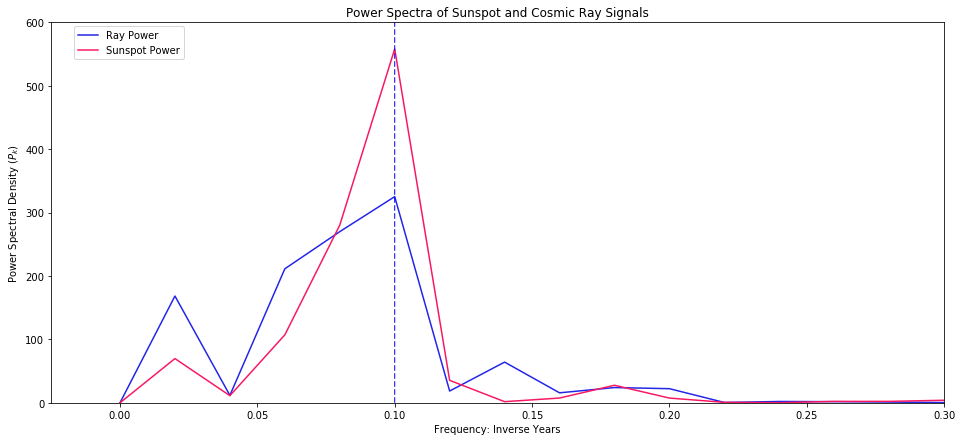

In [12]:
plt.rcParams['figure.figsize']=16,7

RayPwrPlot(RayPwr)
SunPwrPlot(SunspotPwr)
plt.plot(np.ones(6000)*0.1, np.arange(0, 600, 0.1), linestyle='--', color="blue", linewidth=1)
plt.axis([-0.025, 0.3, 0, 600])

plt.ylabel('Power Spectral Density $(P_k)$')
plt.xlabel('Frequency: Inverse Years')
plt.title('Power Spectra of Sunspot and Cosmic Ray Signals')
plt.legend(bbox_to_anchor=(0.025, 0.99), loc=2, borderaxespad=0.)

#From the plot, one can estimate that the dominant mode can be given by 0.1 Years^-1

pylab.savefig('p4_1.jpg')

In [41]:
#Creating an array of numbers from 0 to 600 and then -599 to -1. This represents the possible range of lag, l. 
lag=np.arange(0,601)
negatlag=np.arange(601, 1200)-1200
l=np.append(lag, negatlag)

C_rays=np.zeros(shape=(1200, 1))
C_sun=np.zeros(shape=(1200, 1))

#Padding with zeroes
Raysxval=np.append((rays[:,2]-np.mean(rays[:,2]))/np.std(rays[:,2]), np.repeat(0, 600))

#According to equation 11, we calculate the correlation function

#Generating Transformed values
Raysyval=np.fft.fft(Raysxval)
RayInverseval=np.fft.ifft(Raysyval*np.conj(Raysyval))

for i in range(0, 1200):
    C_rays[i]=1/(600-np.absolute(l[i]))*RayInverseval[i]

Sunxval=np.append(SunspotNormalized, np.repeat(0, 600))
Sunyval=np.fft.fft(Sunxval)
SunInverseval=np.fft.ifft(Sunyval*np.conj(Sunyval))

for i in range(0, 1200):
    C_sun[i]=1/(600-np.absolute(l[i]))*SunInverseval[i]

## P2

In [42]:
#12conv.yr
def RayCorrelationPlot(rayinput):
    return plt.plot(l/12, np.real(rayinput), '-',color=(ran.random(), ran.random(), ran.random()), linewidth=3)
def SunCorrelationPlot(suninput):
    return plt.plot(l/12, np.real(C_sun), '-',color=(ran.random(), ran.random(), ran.random()), linewidth=3)

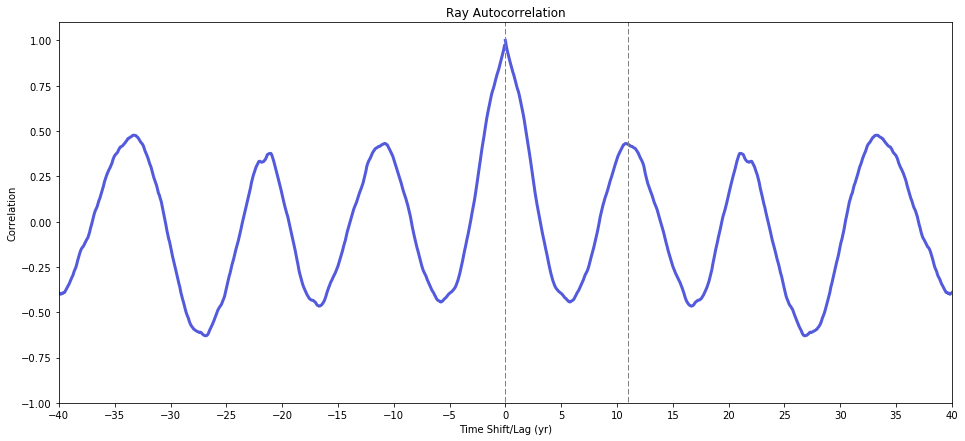

In [43]:
RayCorrelationPlot(C_rays)
plt.xticks(np.arange(-60, 60, 5))
plt.xlabel("Time Shift/Lag (yr)")
plt.ylabel("Correlation")
plt.title("Ray Autocorrelation")
plt.axis([-40, 40, -1, 1.1])

#Estimation Lines
plt.plot(np.zeros(40), np.arange(-2, 2, 0.1), linestyle='--', color="grey", linewidth=1)
plt.plot(np.ones(40)*11, np.arange(-2, 2, 0.1), linestyle='--', color="grey", linewidth=1)

#Looks like a period of around 11 yrs

pylab.savefig('p4_2.jpg')

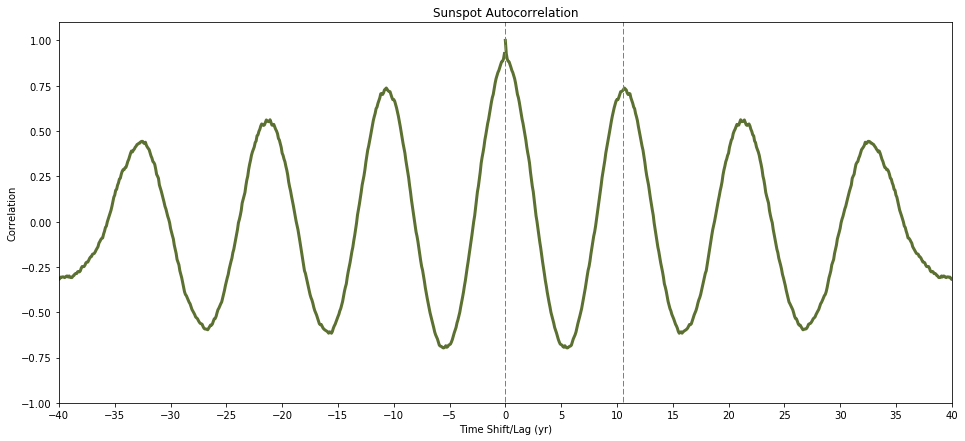

In [44]:
SunCorrelationPlot(C_sun)
plt.xticks(np.arange(-60, 60, 5))
plt.xlabel("Time Shift/Lag (yr)")
plt.ylabel("Correlation")
plt.title("Sunspot Autocorrelation")
plt.axis([-40, 40, -1, 1.1])

#Estimation Lines
plt.plot(np.zeros(40), np.arange(-2, 2, 0.1), linestyle='--', color="grey", linewidth=1)
plt.plot(np.ones(40)*10.5, np.arange(-2, 2, 0.1), linestyle='--', color="grey", linewidth=1)

#10.5 yrs

pylab.savefig('p4_3.jpg')

## P3

In [46]:
Finv_rays_sunspots=np.fft.ifft(Raysyval*np.conj(Sunyval))
C_rays_sunspots = np.zeros(shape=(1200, 1))
C_rays_sunspots2= np.zeros(shape=(1200, 1))

for i in range(0, 1200):
    C_rays_sunspots[i]=1/(600-np.absolute(l[i]))*Finv_rays_sunspots[i]
    
for i in range(0, 599):
    C_rays_sunspots2[i]=1/(600-np.absolute(l[i]))*Finv_rays_sunspots[i]
    
for i in range(601, 1200):
    C_rays_sunspots2[i]=1/(600-np.absolute(l[i]))*Finv_rays_sunspots[i]

Cross Correlation Minimum Index: 10
Cross Correlation Minimum Value: [-0.83801931]
Cross Correlation Time Shift/Lag Value: 0.8333333333333333
Cross Correlation Value at Lag=0 [-0.81361615]


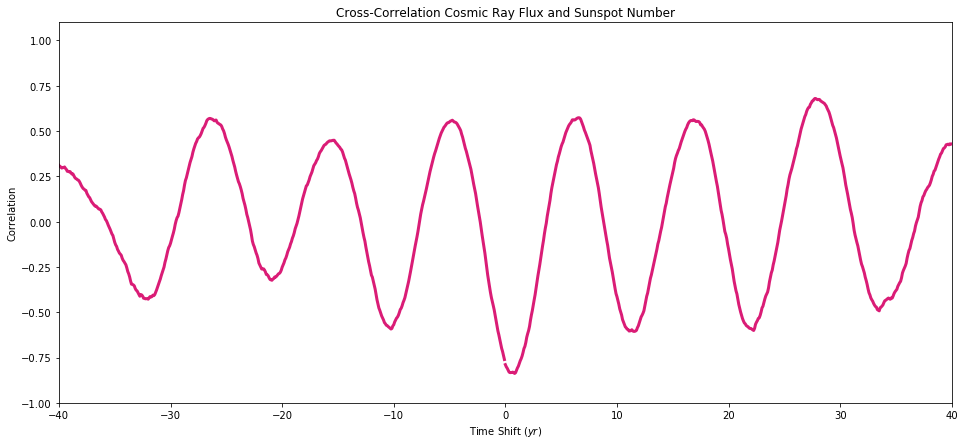

In [47]:
plt.plot(l*(50/600), np.real(C_rays_sunspots), '-', color=(ran.random(), ran.random(), ran.random()), linewidth=3)
plt.title("Cross-Correlation Cosmic Ray Flux and Sunspot Number")
plt.xlabel("Time Shift ($yr$)")
plt.ylabel("Correlation")
plt.axis([-40, 40, -1, 1.1])

#Find the minimum argument
#Print out the value of the minimum
#Print out the x location of the minimum
print("Cross Correlation Minimum Index:", np.argmin(C_rays_sunspots2))
print("Cross Correlation Minimum Value:", C_rays_sunspots2[10])
print("Cross Correlation Time Shift/Lag Value:", 10*(50/600))

#To find the value at 0, since I can't calculate directly, I'll take the average between the two indices.
print("Cross Correlation Value at Lag=0", (C_rays_sunspots2[0]+C_rays_sunspots2[10])/2)

pylab.savefig('p4_4.jpg')

## P4

In [49]:
#!!!Sometimes you gotta re-run this set of code for the graphs to split. Not sure why that occurs.
#Like the entire set below this cell.
#Transforming into freq. space
ray_CC=np.fft.fft(NCcountNormalized)
sunspot_CC=np.fft.fft(SunspotNormalized)

In [50]:
#Filter function that will cut out anything above a certain threshold frequency.
#Here cutoffnumber corresponds to a cutoff frequency of ~n/60 yr^-1
def lowpassfilter(inputarray, cutoffnumber):
    for i in range(cutoffnumber, 600):
        inputarray[i] = 0
        
    for i in range(300, 600-cutoffnumber):
        inputarray[i] = 0
        
    return inputarray

In [51]:
RayCutoff60=np.fft.ifft(lowpassfilter(ray_CC, 60))
RayCutoff30=np.fft.ifft(lowpassfilter(ray_CC, 30))
RayCutoff5=np.fft.ifft(lowpassfilter(ray_CC, 5))

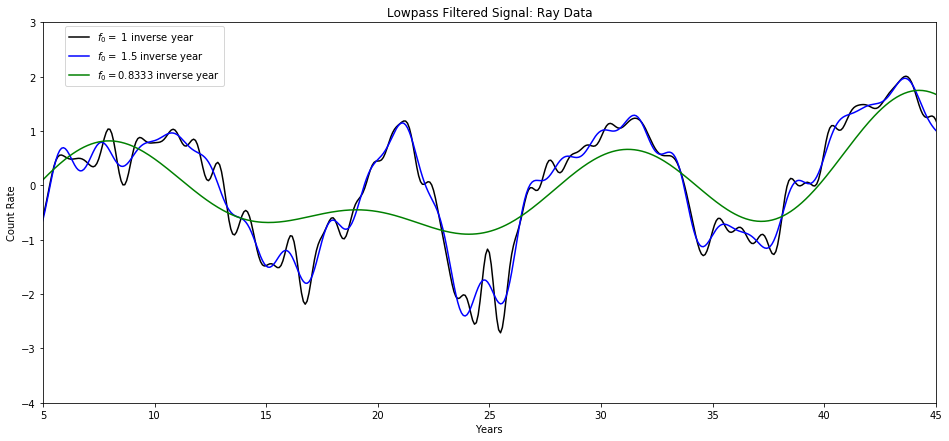

In [56]:
#the 12 factor here is to convert to yrs
plt.plot(np.arange(0,600)/12, 2*RayCutoff60, color="black", linestyle="-", label="$f_0=$ 1 inverse year")
plt.plot(np.arange(0,600)/12, 2*RayCutoff30, color="blue", linestyle="-", label="$f_0=$ 1.5 inverse year")
plt.plot(np.arange(0,600)/12, 2*RayCutoff5, color ="green", linestyle="-", label = "$f_0= $0.8333 inverse year")

plt.legend(bbox_to_anchor=(0.025, 0.99), loc=2, borderaxespad=0.)
plt.axis([5, 45, -4, 3])
plt.title("Lowpass Filtered Signal: Ray Data")
plt.xlabel("Years")
plt.ylabel("Count Rate")

pylab.savefig('p4_5.jpg')

In [53]:
SunspotCutoff60=np.fft.ifft(lowpassfilter(sunspot_CC, 60))
SunspotCutoff30=np.fft.ifft(lowpassfilter(sunspot_CC, 30))
SunspotCutoff5=np.fft.ifft(lowpassfilter(sunspot_CC, 5))

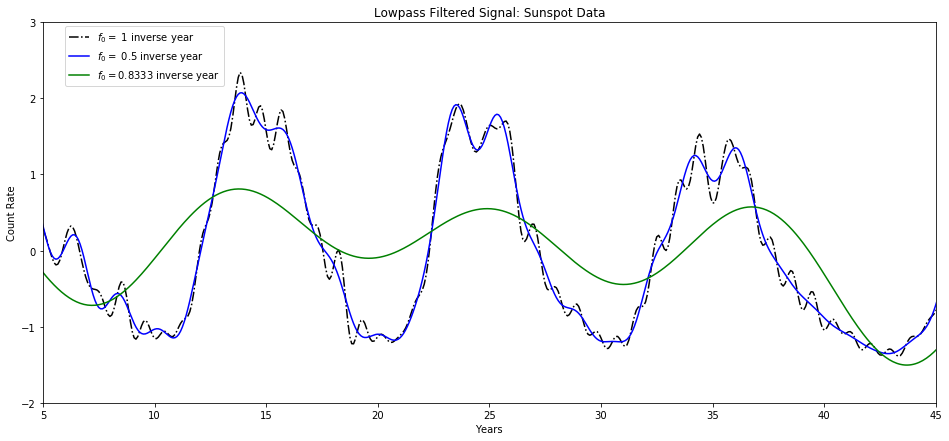

In [55]:
plt.plot(np.arange(0,600)/12, 2*SunspotCutoff60, color="black", linestyle="-.", label="$f_0=$ 1 inverse year")
plt.plot(np.arange(0,600)/12, 2*SunspotCutoff30, color="blue", linestyle="-", label="$f_0=$ 0.5 inverse year")
plt.plot(np.arange(0,600)/12, 2*SunspotCutoff5, color="green", linestyle="-", label="$f_0= $0.8333 inverse year")

plt.legend(bbox_to_anchor=(0.025, 0.99), loc=2, borderaxespad=0.)
plt.axis([5, 45, -2, 3])
plt.title("Lowpass Filtered Signal: Sunspot Data")
plt.xlabel("Years")
plt.ylabel("Count Rate")

pylab.savefig('p4_6.jpg')